**Importing Libraries**

In [8]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


**Reading the data from a Excel file**

In [9]:
# Reading the data from excel file
data = pd.read_excel("/content/HealthTech Hyd.xlsx")

**Exploring the Data**

In [10]:
# Display the first few rows of the dataset
print(data.head())
# Display information about the dataset
print(data.info())

                    Startup name  \
0                        Bionsys   
1  Maven Scientific Laboratorie    
2         Aerobiosys Innovations   
3                       Bluesemi   
4                         Hecoll   

                                        Focus sector  \
0                         Medical Devices Biomedical   
1                                Healthcare Services   
2                 HealthTech  / MedTech / Healthcare   
3  Community, Consumer Electronics, HealthTech / ...   
4  Direct-To-Consumer Brands, Clothing & Apparel,...   

                                          Sub-sector  \
0                                 Pathogen Detection   
1        R&D of pharmaceuticals and biotech products   
2                               Low-cost Ventilators   
3                      Creating non-invasive gadgets   
4  Fabric filters pollutants and Kill viruses/bac...   

                                             Details     Enabler  \
0  Revolutionizig Pathogen Detection with

# **Data Visualization of HealthTech Startups in Hyderabad**

**Number of HealthTech Startups Founded Each Year**

In [11]:
# Counting the number of startups founded each year
startup_count = data["Founding year"].value_counts().sort_index()

# Creating a bar trace
bar_trace = go.Bar(
    x=startup_count.index,
    y=startup_count.values,
    marker=dict(color='teal')
)

# Creating the layout
layout = go.Layout(
    title="Number of HealthTech Startups Founded Each Year",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Count"),
    height=500,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Creating the figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Displaying the interactive chart
fig.show()


**Funding Amount vs. Founding Year**

In [12]:
# Clean and convert "Funding Received" column to numeric data type
data["Funding Received"] = data["Funding Received"].replace(r'[^\d.]', '', regex=True).astype(float)

# Create an interactive scatter plot using plotly's graph_objects
fig = go.Figure(data=go.Scatter(
    x=data['Founding year'],
    y=data['Funding Received'],
    mode='markers',
    marker=dict(
        size=10,
        color=data['Funding Received'],
        colorscale='Greens',
        showscale=True
    ),
    text=data['Startup name'],
    hovertemplate=(
        '<b>Startup:</b> %{text}<br>'
        '<b>Founding Year:</b> %{x}<br>'
        '<b>Funding Amount:</b> $%{y:,.2f}M<br>'
    )
))

fig.update_layout(
    title='Funding Amount vs. Founding Year',
    xaxis=dict(title='Founding Year'),
    yaxis=dict(
        title='Funding Amount',
        tickformat='$,-.2fM'
    ),
    hovermode='closest',
    height=600,
    showlegend=False,
    coloraxis=dict(
        colorbar=dict(
            title='Funding Amount',
            tickprefix='$',
            ticksuffix='M'
        )
    )
)

fig.show()


**Top Investors in HealthTech space**

In [13]:
# Splitting the values in the Investors column
top_investors = data['Investors'].str.split(', ').explode().value_counts().nlargest(20)

# Reverse the order of the data
top_investors = top_investors.iloc[::-1]

# Create an interactive bar plot using plotly's graph_objects
fig = go.Figure(data=[go.Bar(x=top_investors.values, y=top_investors.index, orientation='h')])

fig.update_layout(
    title="Top Investors",
    xaxis=dict(title="Number of Startups"),
    yaxis=dict(title="Investor"),
    height=600,
    margin=dict(l=100, r=20, t=80, b=20),
)

fig.show()


**Top Business Models in HealthTech startups**

In [14]:
# Splitting the values in the Business Model column
top_business_models = data['Business Model'].str.split(', ').explode().value_counts().nlargest(5)

# Reverse the order of the data
top_business_models = top_business_models.iloc[::-1]

# Create an interactive bar plot using plotly's graph_objects
fig = go.Figure(data=[go.Bar(x=top_business_models.values, y=top_business_models.index, orientation='h')])

fig.update_layout(
    title="Top Business Models",
    xaxis=dict(title="Number of Startups"),
    yaxis=dict(title="Business Models"),
    height=600,
    margin=dict(l=100, r=20, t=80, b=20),
)

fig.show()


**Focus sectors of HealthTech startups**

In [15]:
# Unique values in Focus sector column
data["Focus sector"].unique()

array(['Medical Devices Biomedical', 'Healthcare Services',
       'HealthTech  / MedTech / Healthcare',
       'Community, Consumer Electronics, HealthTech / MedTech / Healthcare, Health, wellness & fitness',
       'Direct-To-Consumer Brands, Clothing & Apparel, HealthTech / MedTech / Healthcare',
       'Machine Learning, HealthTech / MedTech / Healthcare, BioTech/BioPharmaceutical',
       'Software, HealthTech / MedTech / Healthcare',
       'HealthTech / MedTech / Healthcare',
       'BioTech, HeathTech / MedTech / Healthcare, Life Sciences',
       'HeathTech / MedTech / Healthcare', 'Healthcare IT',
       'Health and Wellness', 'Healthcare Technology', 'Biotechnology',
       'MedTech', 'Assistance Technology', 'Pharmaceutical',
       'Healthcare services', 'Community', 'Health, Wellness & Fitness',
       'Direct-To-Consumer Brands, Health, Willness & Fitness',
       'Analytics & BI, Blockchain, HealthTech / MedTech / Healthcare, Fintech',
       'HealthTech / MedTech / Hea

In [16]:
# Splitting the values in the Focus sector column
top_sector = data['Focus sector'].str.split(', ').explode().value_counts().nlargest(20)

# Reverse the order of the data
top_sector = top_sector.iloc[::-1]

# Create an interactive bar plot using plotly's graph_objects
fig = go.Figure(data=[go.Bar(x=top_sector.values, y=top_sector.index, orientation='h')])

fig.update_layout(
    title="Top Sectors",
    xaxis=dict(title="Number of Startups"),
    yaxis=dict(title="Focus Sector"),
    height=600,
    margin=dict(l=100, r=20, t=80, b=20),
)

fig.show()


In [17]:
# Splitting values in Focus sector column
sector_counts = data['Focus sector'].str.split(', ').explode().value_counts().nlargest(20)

# Creating an interactive pie chart using plotly's graph_objects
fig = go.Figure(data=[go.Pie(labels=sector_counts.index, values=sector_counts, hole=0.3)])

fig.update_layout(
    title="Distribution of Focus Sectors",
    annotations=[dict(text='Focus Sectors', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()


**Distribution of Startup Enabler**

In [18]:
# Value counting startup enabler
enabler = data["Enabler"].value_counts()

fig = go.Figure(data=[go.Pie(labels=enabler.index, values=enabler, hole=0.3)])
fig.update_layout(title="Distribution of Startup Enabler")

fig.show()

**Funding by Year & Sector**

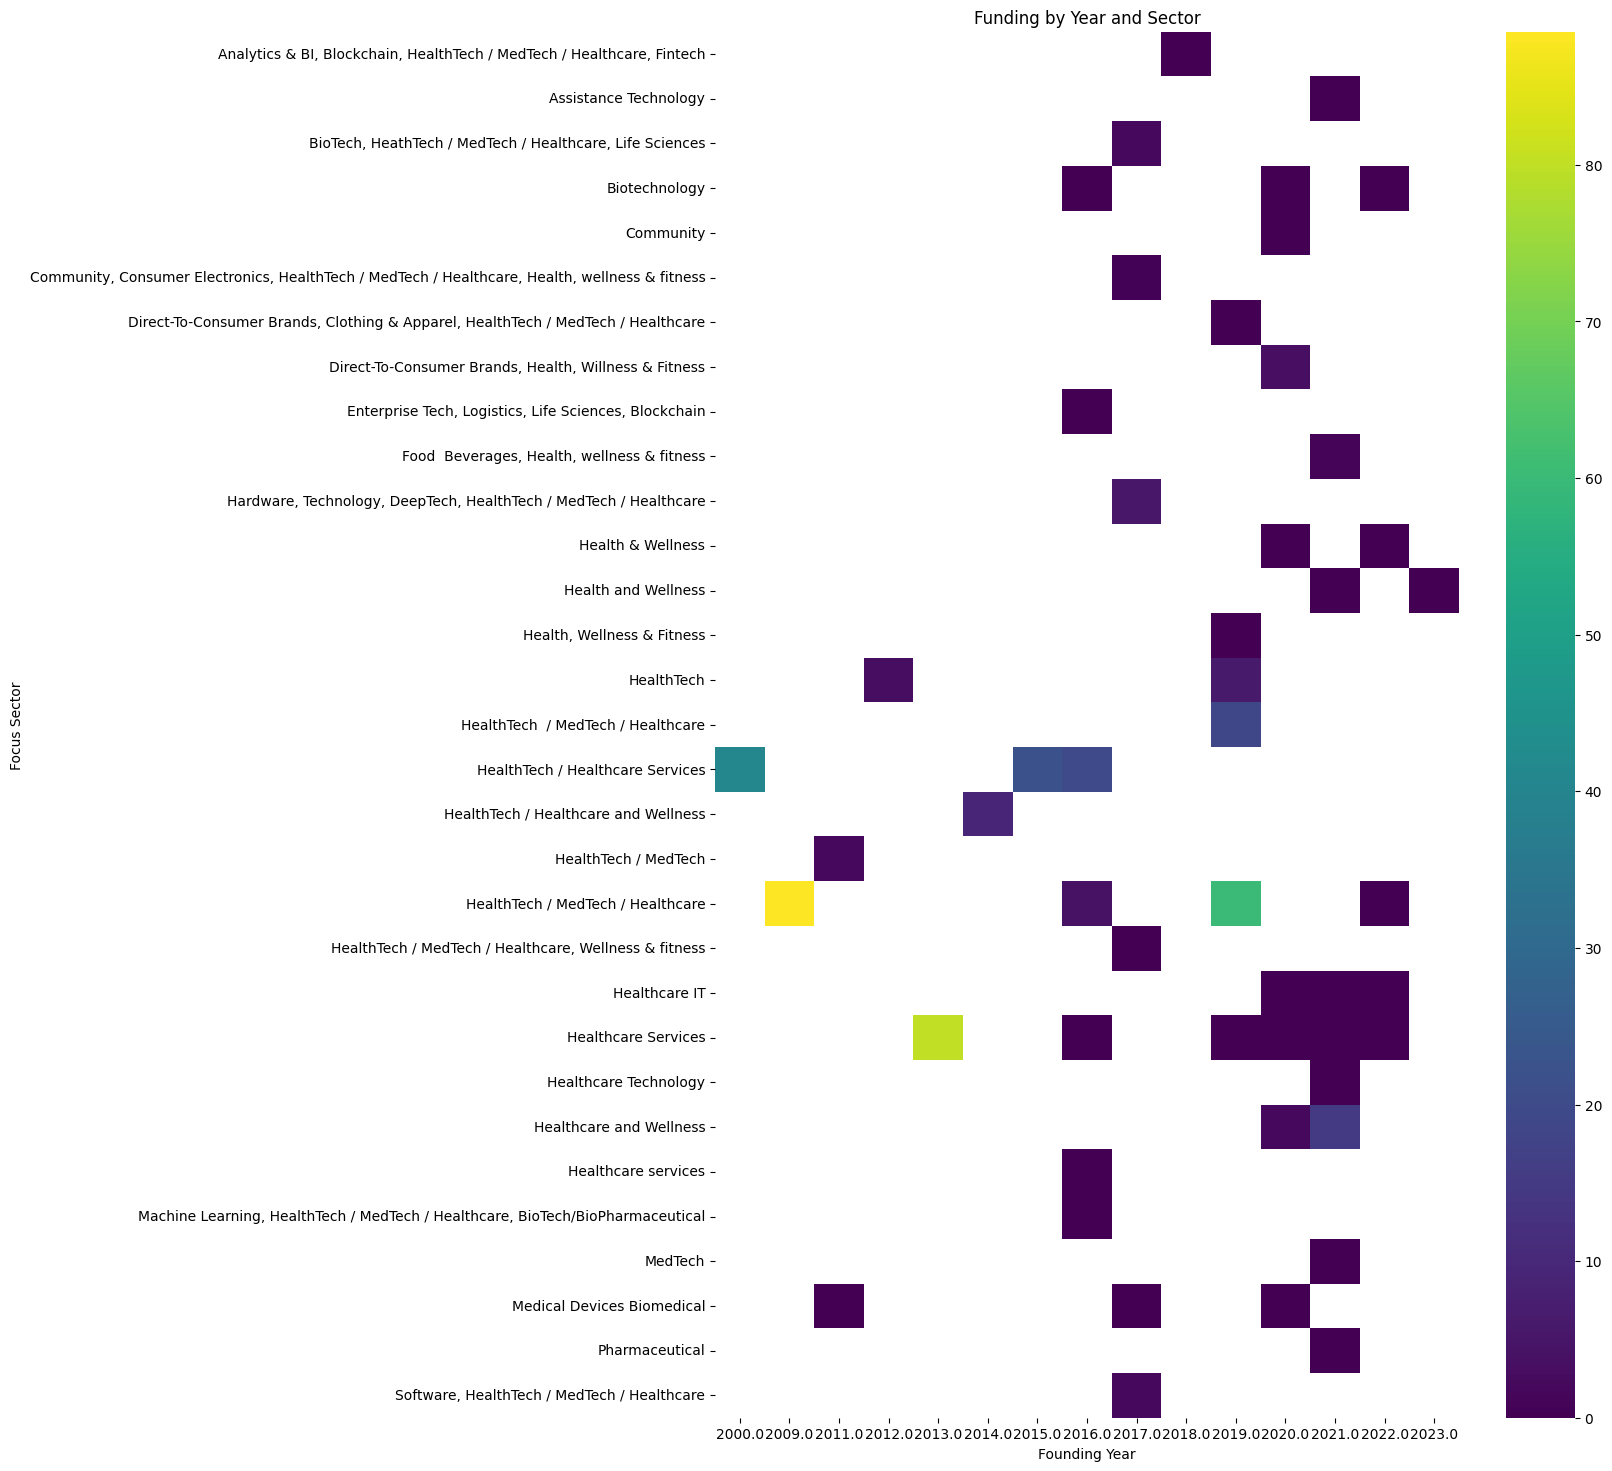

In [19]:
# Convert "Funding Received" column to numeric data type
data["Funding Received"] = pd.to_numeric(data["Funding Received"], errors='coerce')

# Pivot table to aggregate funding by year and sector
pivot_table = data.pivot_table(
    index='Focus sector',
    columns='Founding year',
    values='Funding Received',
    aggfunc='sum'
)

plt.figure(figsize=(12, 18))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Funding by Year and Sector')
plt.xlabel('Founding Year')
plt.ylabel('Focus Sector')
plt.show()
